# Load, Preprocessing, Cleaning Dataset

## Import Module yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()

## Load Dataset yang digunakan

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease/heart_disease.csv")

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


## Bussiness Question

1. Faktor apa saja yang paling perlu diperhatikan dalam menjaga kesehatan diri terutama kesehatan jantung ?
2. Bagaimana performa model prediksi jika hanya menggunakan fitur non-medis dan pemeriksaan dasar dibandingkan dengan model yang terdapat fitur medis??
3. Faktor non-medis apa yang paling mempengaruhi kondisi medis dan berperan signifikan dalam meningkatkan risiko penyakit jantung?

## Goals
1. Mengidentifikasi faktor utama yang berkontribusi terhadap penyakit jantung berdasarkan korelasi tertinggi dengan kondisi tersebut.
2. Membagi dataset ke dalam dua bagian:
        - Dataset dengan fitur lengkap (medis dan non-medis).
        - Dataset dengan fitur terbatas (hanya non-medis dan pemeriksaan dasar). Membangun model prediksi berbasis   Machine Learning untuk kedua dataset dan membandingkan akurasi serta performa keduanya.
3. Mengidentifikasi faktor non-medis yang memiliki dampak signifikan terhadap kondisi medis yang berhubungan dengan penyakit jantung.


# Exploratory Data Analysis

## EDA - Deskripsi Variable

In [3]:
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(['float64']).columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [5]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


## EDA - Missing Values Handling


In [6]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': df.isnull().sum(), 'Missing Percentage': missing_percentage})
print(missing_df.sort_values(by='Missing Percentage'))

                      Missing Count  Missing Percentage
Heart Disease Status              0                0.00
Gender                           19                0.19
Blood Pressure                   19                0.19
Homocysteine Level               20                0.20
Family Heart Disease             21                0.21
Fasting Blood Sugar              22                0.22
Stress Level                     22                0.22
BMI                              22                0.22
Sleep Hours                      25                0.25
Low HDL Cholesterol              25                0.25
Smoking                          25                0.25
Exercise Habits                  25                0.25
High LDL Cholesterol             26                0.26
Triglyceride Level               26                0.26
CRP Level                        26                0.26
High Blood Pressure              26                0.26
Age                              29             

In [7]:
for columns in cat_columns:
    x = df[columns]
    x.ffill(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [8]:
df["Alcohol Consumption"] = df["Alcohol Consumption"].fillna("Unknown") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [9]:
num_col = df.select_dtypes(include=['number'])
num_col.isnull().sum()

num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  9971 non-null   float64
 1   Blood Pressure       9981 non-null   float64
 2   Cholesterol Level    9970 non-null   float64
 3   BMI                  9978 non-null   float64
 4   Sleep Hours          9975 non-null   float64
 5   Triglyceride Level   9974 non-null   float64
 6   Fasting Blood Sugar  9978 non-null   float64
 7   CRP Level            9974 non-null   float64
 8   Homocysteine Level   9980 non-null   float64
dtypes: float64(9)
memory usage: 703.2 KB


In [10]:

df.fillna(df.mean(numeric_only = True), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   

In [11]:
num_col.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


## EDA - Univariate Analysis

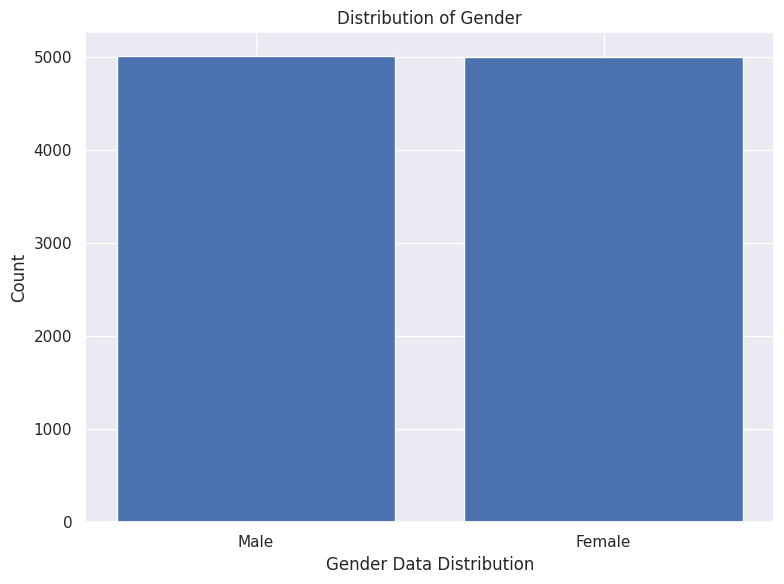

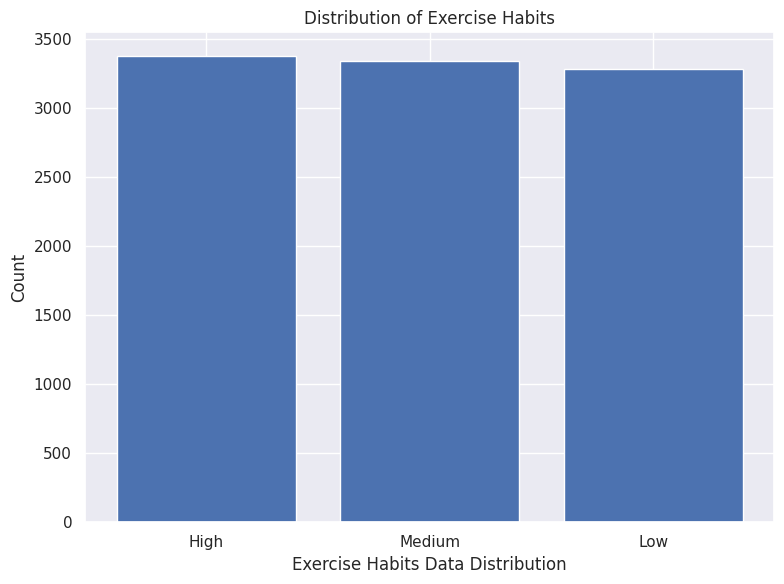

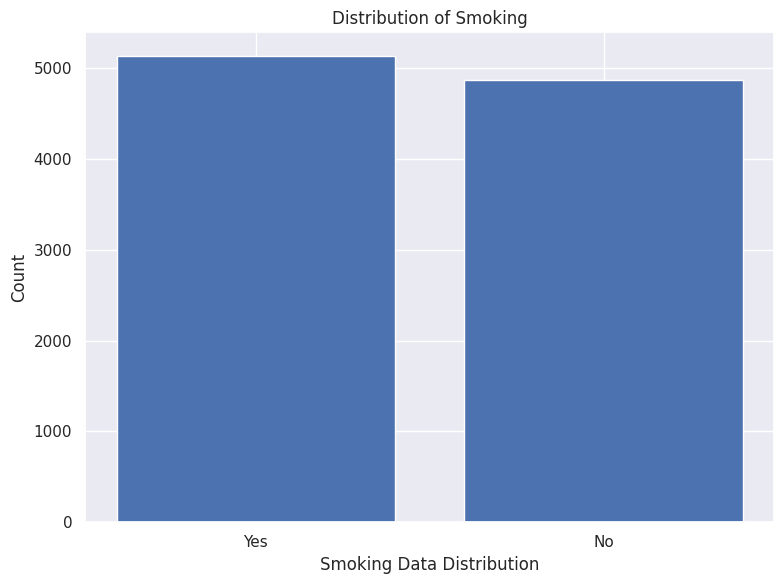

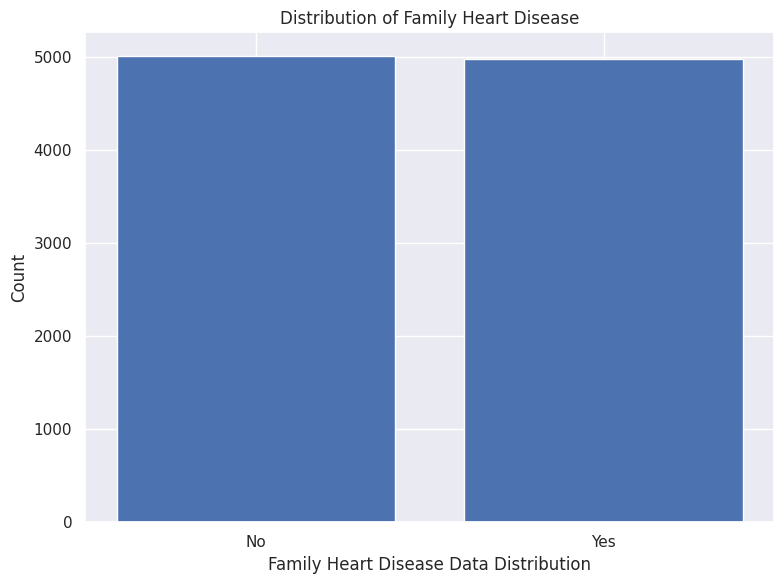

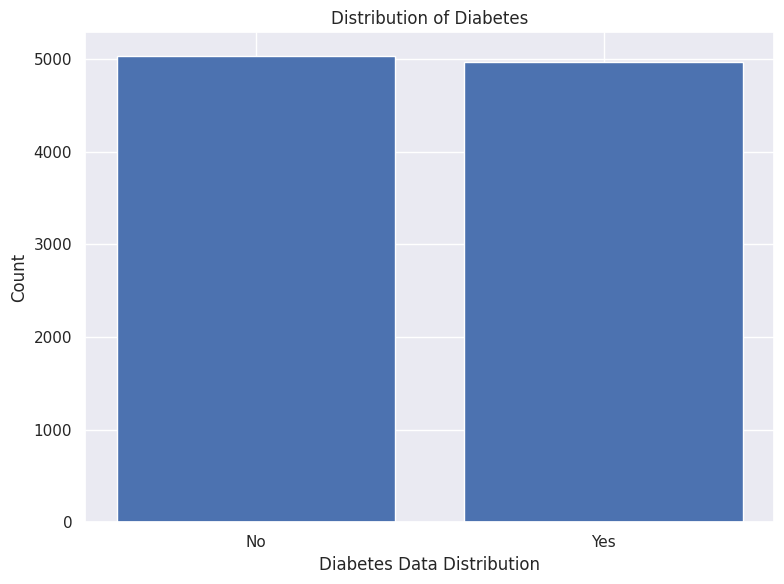

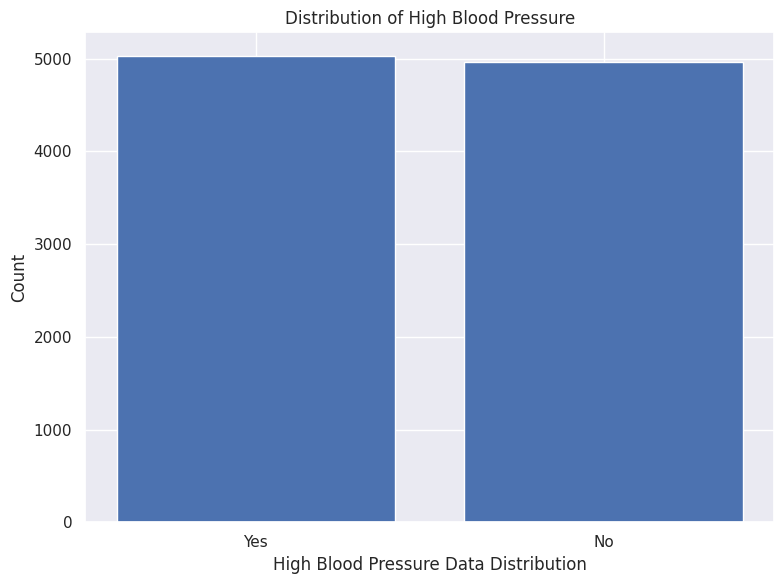

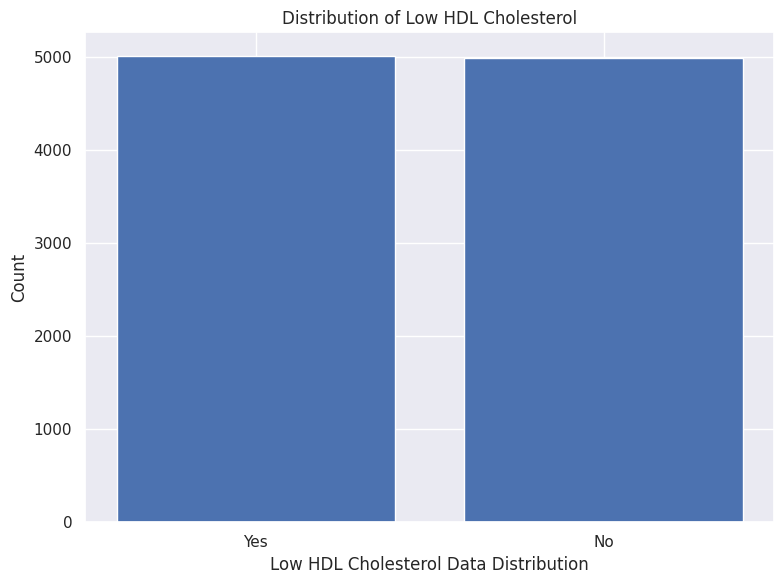

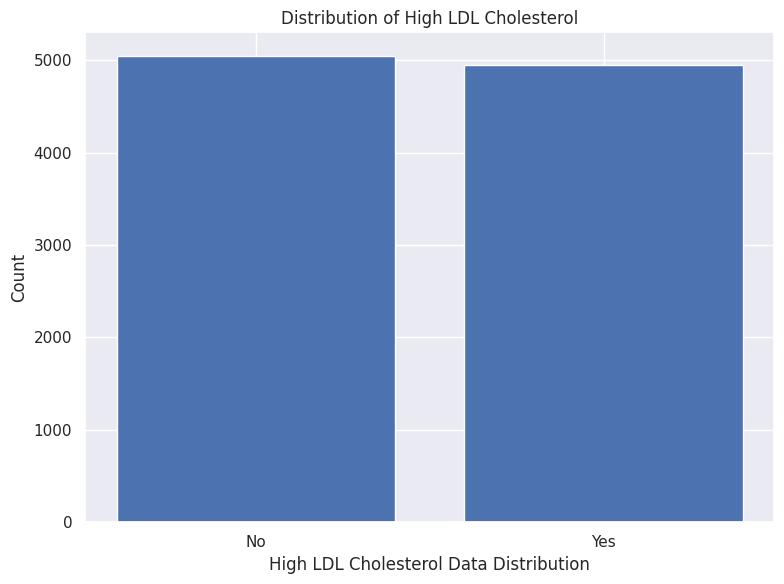

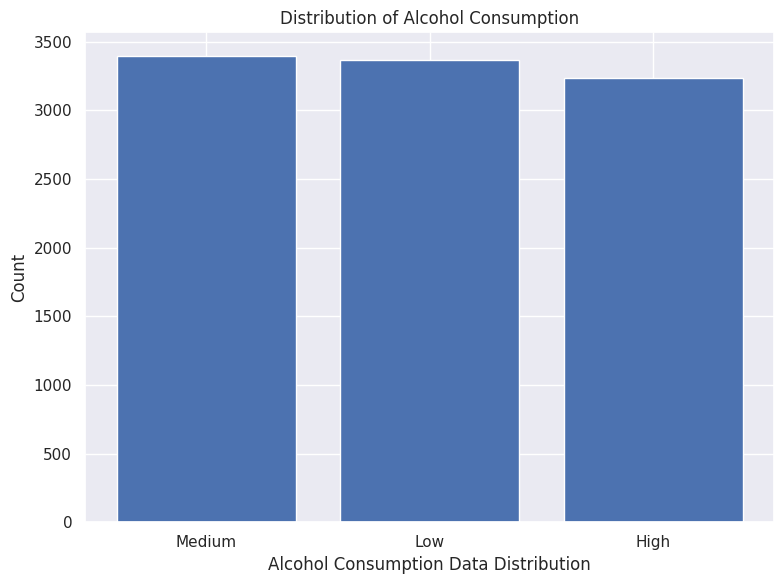

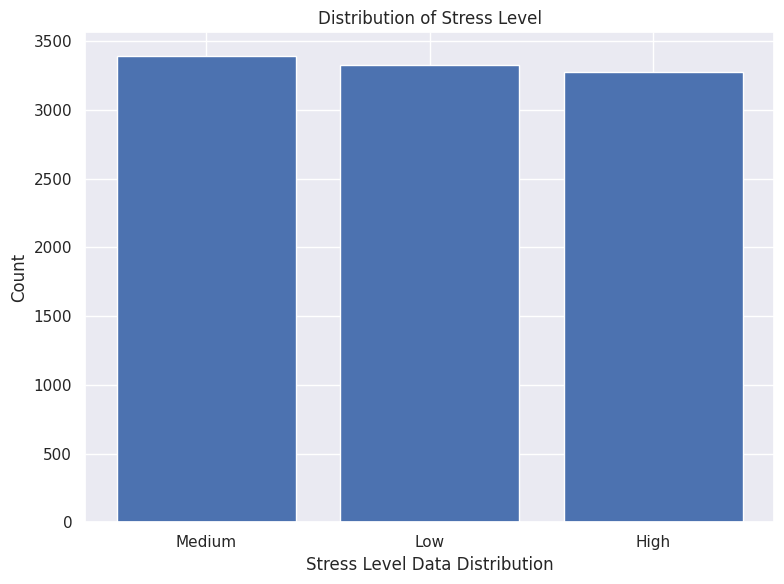

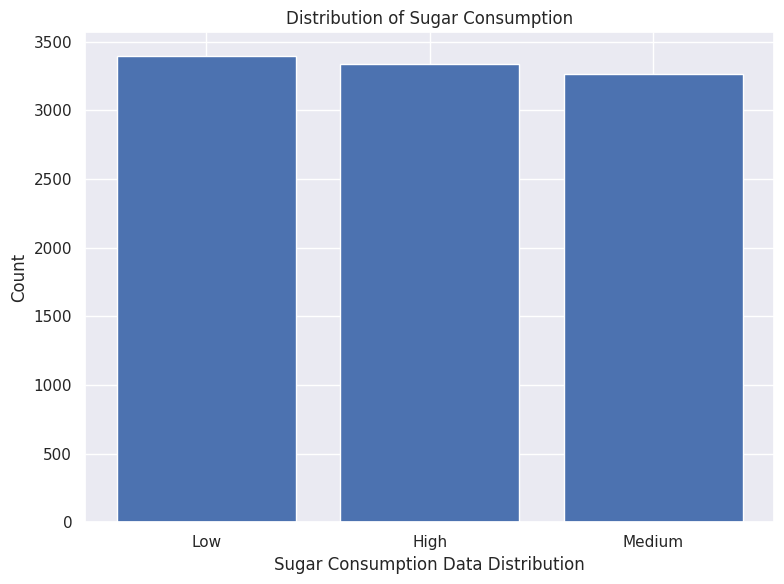

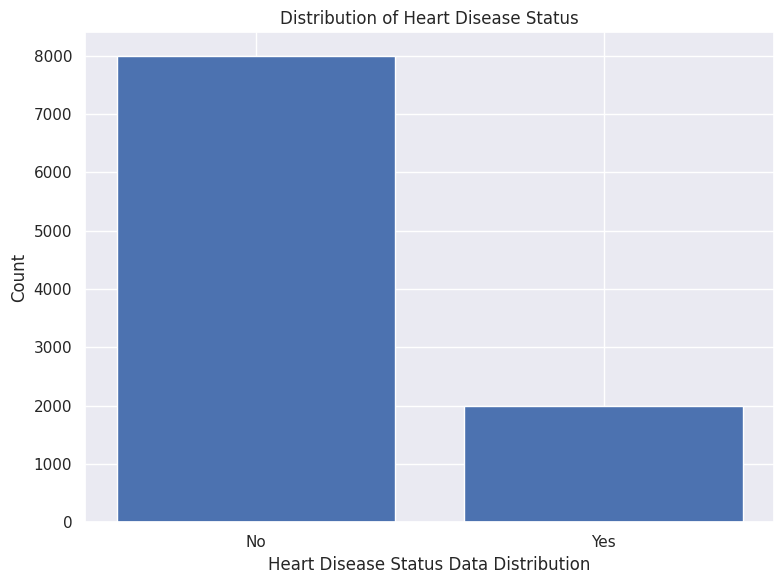

In [12]:
for i in cat_columns:
    data = df[i].value_counts(dropna=False)
    plt.figure(figsize = (8, 6))
    plt.bar(data.index.astype(str),data.values)
    plt.xlabel(f"{i} Data Distribution")
    plt.ylabel("Count")
    plt.title(f"Distribution of {i}")
    plt.tight_layout()
    plt.show

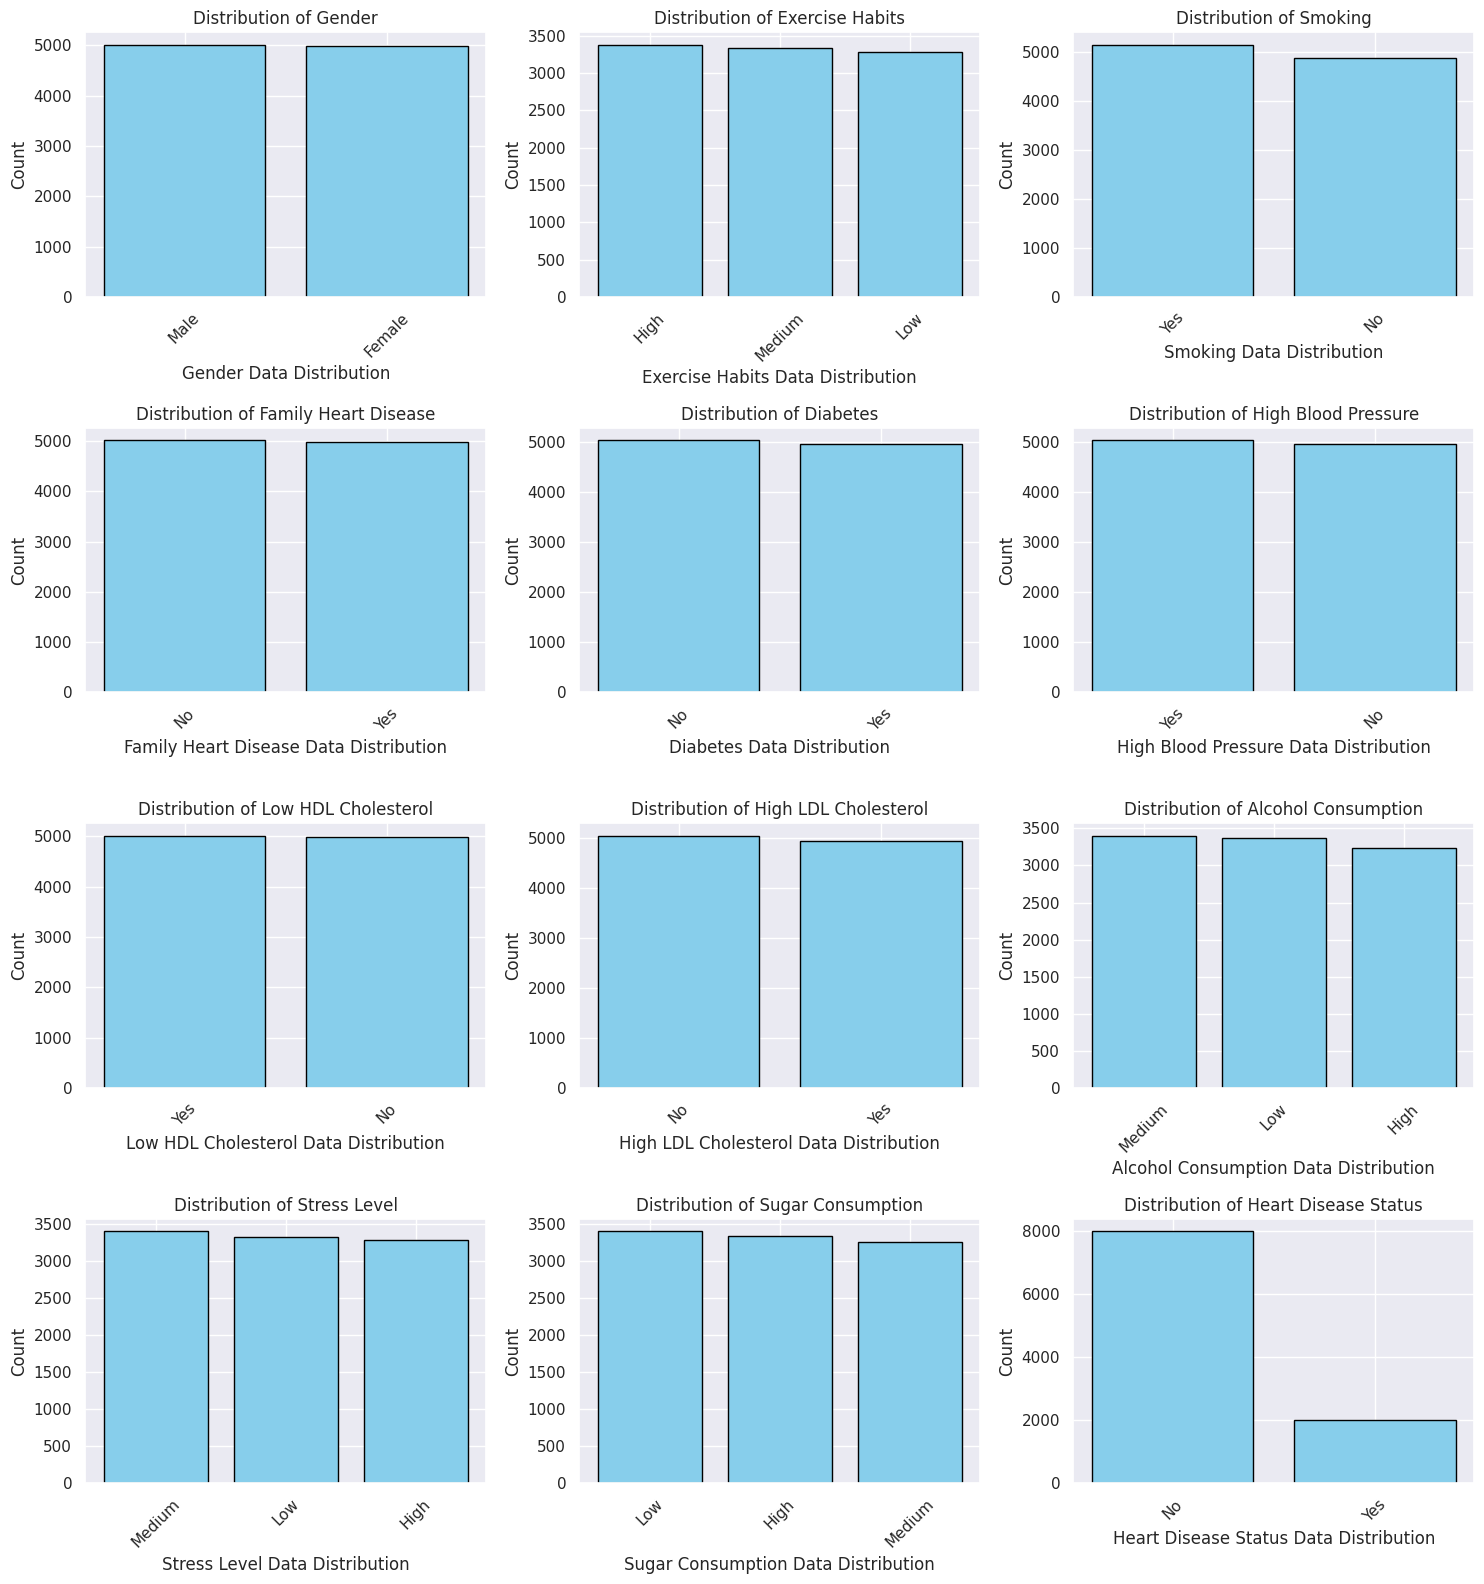

In [13]:
num_plots = len(cat_columns)  # Hitung jumlah plot yang dibutuhkan
cols = 3  # Jumlah grafik per baris
rows = -(-num_plots // cols)  # Hitung jumlah baris dengan pembulatan ke atas

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))  # Atur ukuran figure
axes = axes.flatten()  # Flatten jika subplot lebih dari satu baris

for idx, col in enumerate(cat_columns):
    data = df[col].value_counts(dropna=False)  # Hitung distribusi nilai
    axes[idx].bar(data.index.astype(str), data.values, color='skyblue', edgecolor='black')
    axes[idx].set_xlabel(f"{col} Data Distribution")
    axes[idx].set_ylabel("Count")
    axes[idx].set_title(f"Distribution of {col}")
    axes[idx].tick_params(axis='x', rotation=45)  # Rotasi label agar lebih terbaca

# Hapus subplot kosong jika jumlah plot tidak pas dengan grid
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Atur tata letak agar tidak bertabrakan
plt.show()